In [1]:
'''
NATE USE THIS ONE!!!
'''

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pprint import pprint
from IPython.display import clear_output
from sklearn.metrics import roc_curve

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.optimizers import Adam 
from keras.utils import to_categorical


np.random.seed(42)

In [3]:
fin_path = 'Data/Raw Data/Single/' #training spectra

testin_path = 'Data/Raw Data/Mixed/Test Set/' #testing spectra

val_split = 0.2

learning_rate = 0.0005
batch_size = 200
epochs = 50

train_accuracy_path = '/Data/Model Data/MLP/train_accuracy.csv'
val_accuracy_path = '/Data/Model Data/MLP/val_accuracy.csv'
train_loss_path = '/Data/Model Data/MLP/train_loss.csv'
val_loss_path = '/Data/Model Data/MLP/val_loss.csv'
val_cm_path = '/Data/Model Data/MLP/val_confusion_matrix.csv'
test_cm_path = '/Data/Model Data/MLP/test_confusion_matrix.csv'
cr_path = '/Data/Model Data/MLP/classification_report.csv'


In [4]:
def load_spectra():
  import helper as h
  X_train,X_dev,y_train,y_dev=h.dfbuilder(fin_path=fin_path,split_df=True,dev_size=val_split,r_state=42,raw=True)
  test_data=h.dfbuilder(testin_path,False,0,42,raw=True)
  X_test=test_data.drop(columns=['label'])
  y_test=test_data[['label']]


  from sklearn.preprocessing import RobustScaler
  scaler=RobustScaler().fit(X_train)
  _X_train=scaler.transform(X_train)
  _X_dev=scaler.transform(X_dev)
  _X_test=scaler.transform(X_test)
    
  num_minerals = np.max(y_train)+1
  return _X_train, y_train, _X_dev, y_dev, _X_test, y_test, num_minerals
  

In [5]:
X_train, y_train, X_val, y_val, X_test, y_test, num_minerals = load_spectra()

Master data set shape is (71674, 951) 

 Master data set is
                               150      151      152      153      154  \
albite_train_015s_5250-0  1843.10  1848.63  1855.44  1872.17  1893.32   
albite_train_015s_5250-1  1835.52  1845.35  1855.77  1869.89  1889.67   
albite_train_015s_5250-2  1802.07  1814.18  1831.13  1853.05  1880.13   
albite_train_015s_5250-3  1808.57  1815.09  1823.15  1839.00  1864.86   
albite_train_015s_5250-4  1800.92  1810.23  1822.96  1839.00  1858.79   
...                           ...      ...      ...      ...      ...   
qtz_train_015s_625-620    2576.47  2568.46  2556.91  2539.18  2439.98   
qtz_train_015s_625-621    2575.20  2541.80  2516.90  2489.10  2427.84   
qtz_train_015s_625-622    2575.00  2558.69  2553.06  2531.36  2460.90   
qtz_train_015s_625-623    2562.41  2541.03  2520.78  2504.17  2451.60   
qtz_train_015s_625-624    2566.18  2529.75  2500.82  2475.56  2412.82   

                              155      156      157      158  

In [6]:
model = Sequential()
model.add(Dense(100, input_shape = (len(X_train[0]),)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(25))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_minerals, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               95100     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2525      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                312       
Total params: 97,937
Trainable params: 97,937
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer = Adam(learning_rate), loss = 'categorical_crossentropy', metrics = ['accuracy'])
training = model.fit(X_train, to_categorical(y_train), batch_size, epochs, validation_data = (X_val, to_categorical(y_val)))

Epoch 1/50
287/287 [==============================] - 1s 2ms/step - loss: 0.8792 - accuracy: 0.7794 - val_loss: 0.2877 - val_accuracy: 0.9452
Epoch 2/50
287/287 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9513 - val_loss: 0.1290 - val_accuracy: 0.9660
Epoch 3/50
287/287 [==============================] - 0s 2ms/step - loss: 0.1319 - accuracy: 0.9767 - val_loss: 0.1369 - val_accuracy: 0.9665
Epoch 4/50
287/287 [==============================] - 0s 2ms/step - loss: 0.1086 - accuracy: 0.9791 - val_loss: 0.0927 - val_accuracy: 0.9803
Epoch 5/50
287/287 [==============================] - 0s 2ms/step - loss: 0.0787 - accuracy: 0.9841 - val_loss: 0.0582 - val_accuracy: 0.9901
Epoch 6/50
287/287 [==============================] - 0s 2ms/step - loss: 0.1545 - accuracy: 0.9758 - val_loss: 0.0600 - val_accuracy: 0.9880
Epoch 7/50
287/287 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9839 - val_loss: 0.0711 - val_accuracy: 0.9859
Epoch 

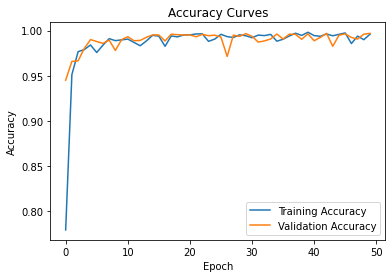

In [8]:
train_accuracy = training.history['accuracy']
train_accuracy_df = pd.DataFrame(train_accuracy)
#train_accuracy_df.to_csv(train_accuracy_path, index = False, header = False)

val_accuracy = training.history['val_accuracy']
val_accuracy_df = pd.DataFrame(val_accuracy)
#val_accuracy_df.to_csv(val_accuracy_path, index = False, header = False)


plt.plot(train_accuracy, label = 'Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'best')
plt.show()

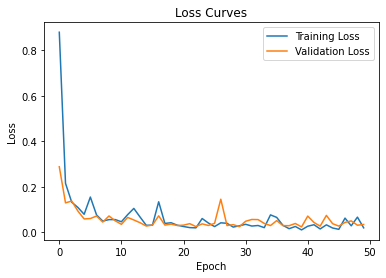

In [9]:
train_loss = training.history['loss']
train_loss_df = pd.DataFrame(train_loss)
#train_loss_df.to_csv(train_loss_path, index = False, header = False)

val_loss = training.history['val_loss']
val_loss_df = pd.DataFrame(val_loss)
#val_loss_df.to_csv(val_loss_path, index = False, header = False)

plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'best')
plt.show()

In [10]:
def plot_confusion_matrix(y_true, y_pred, title, path):
  labels = np.arange(num_minerals)
  cm = confusion_matrix(y_true, y_pred, labels)
  cm_df = pd.DataFrame(cm, columns = labels, index = labels)
  #cm_df.to_csv(path, index = True, header = True)
  cm_df.columns.name = 'Predicted'
  cm_df.index.name = 'Actual'
  sn.heatmap(cm_df, annot = True, cmap = 'Blues', fmt = 'd')
  plt.title(title)
  plt.show()

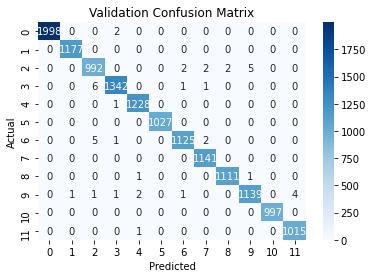

In [11]:
plot_confusion_matrix(y_val, np.argmax(model.predict(X_val), axis = 1), 'Validation Confusion Matrix', val_cm_path)

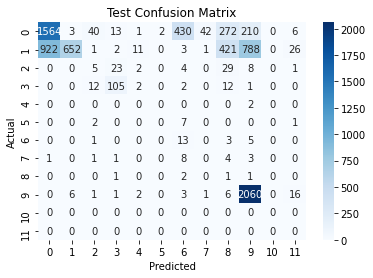

[[3.6381511e-04 4.9299207e-03 1.2513464e-02 ... 5.8765888e-01
  3.0952914e-09 2.5117058e-06]
 [7.1412063e-04 7.9832859e-03 4.3034013e-03 ... 2.7546629e-01
  1.1247856e-08 1.7947117e-06]
 [3.7587874e-05 5.2973384e-05 1.5597477e-02 ... 9.2174786e-01
  3.5628305e-16 3.6076351e-08]
 ...
 [1.0000000e+00 0.0000000e+00 1.2205740e-31 ... 0.0000000e+00
  5.6711575e-38 0.0000000e+00]
 [1.0000000e+00 6.2361355e-22 9.2170283e-14 ... 5.3378339e-15
  1.4610427e-15 6.2958841e-17]
 [1.0000000e+00 8.0848343e-35 2.1738620e-21 ... 9.4081770e-26
  5.1312044e-25 1.5336398e-28]]


In [12]:
plot_confusion_matrix(y_test, np.argmax(model.predict(X_test), axis = 1), 'Test Confusion Matrix', test_cm_path) 
print(model.predict(X_test))

In [13]:
print(classification_report(y_test, np.argmax(model.predict(X_test), axis = -1)))

cr = classification_report(y_test, np.argmax(model.predict(X_test), axis = -1), output_dict = True)
cr_df = pd.DataFrame(cr).transpose()
#cr_df.to_csv(cr_path, index = True, header = True)

              precision    recall  f1-score   support

           0       0.60      0.61      0.60      2583
           1       0.91      0.23      0.37      2827
           2       0.08      0.07      0.07        72
           3       0.72      0.78      0.75       134
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        10
           6       0.03      0.59      0.05        22
           7       0.00      0.00      0.00        18
           8       0.00      0.20      0.00         5
           9       0.66      0.98      0.79      2096
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00       212

    accuracy                           0.55      7981
   macro avg       0.25      0.29      0.22      7981
weighted avg       0.71      0.55      0.55      7981

